### SHOPIFY : Winter 2021 Data Science Intern Challenge

###  Problem Descrption

#### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of 3145.13 Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


### Problem Statement 

#### The average order value is very high, therefore we have to analyise the data correctly in order to obtain an accurate value.

### Importing all the necessary packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the data

In [2]:
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
print('Number of datapoints : ', data.shape[0])
print('Number of features : ', data.shape[1])
data.head(10)

Number of datapoints :  5000
Number of features :  7


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


### Let us do Exploratory data analysis

#### Checking for duplicates

In [3]:
#All the features other than order_id can have duplicates. So we check duplicates only for order_id
dups=data.duplicated(subset=['order_id'], keep='first')
#returns false for each points if there is no duplicate, returns true otherwise
dups.value_counts()

False    5000
dtype: int64

#### As we can see that there are no duplicates. 

In [4]:
data.describe() #we can get the overview of the values of each feature. 

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [28]:
data.info() #We can use this to understand what type of features are present in the data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


#### The data has 5000 datapoints and 7 features with no null values

In [6]:
#Analysing the payment_method feature

data['payment_method'].value_counts()

credit_card    1735
debit          1671
cash           1594
Name: payment_method, dtype: int64

#### We can see that highest number of the orders are placed using credit cards.

In [7]:
#Analysing the total_items feature

data['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

####  We can see from the above result that majority number of customers typically order 2 or 1 items. There are 17 customers who ordered 2000 items. 

In [8]:
#Analysing the order_amount feature

data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

####  We can see that the mean value is very high i.e 3145.128. This might be due to the presence of outliers in the data.

### Let us now analyse the features

### Analysing the 'order_amount' feature

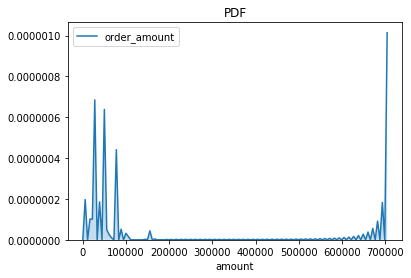

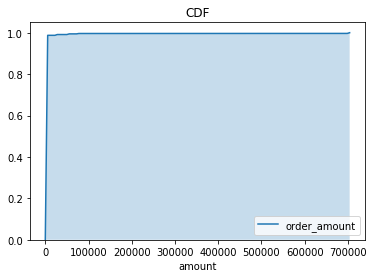

In [9]:
#univariate analysis of the order_amount feature to check the distribution of the data points

x=data['order_amount']

sns.kdeplot(x, shade=True)
plt.xlabel('amount')
plt.title("PDF")
plt.show()

sns.kdeplot(x, shade=True, cumulative=True)
plt.xlabel('amount')
plt.title('CDF')

plt.show()

#### From the plot we can see that there is a sudden increase in the order_amount which might be due to outliers.

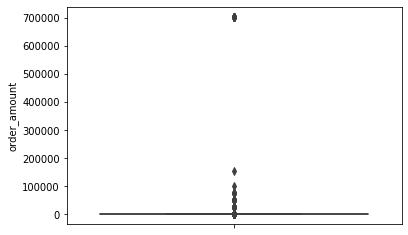

In [10]:
#using box plot to check if there are any outliers

sns.boxplot(y="order_amount", data=data)
plt.show()

#### We can see from the above plot that there are outliers in this feature. That means there are a few orders with high amount.

In [11]:
#filtering the data which has high order_amount

high_amt = data['order_amount'].sort_values(ascending=False)
high_amt = high_amt.head(70)
high_amt.value_counts()

25725     19
704000    17
51450     16
77175      9
1408       2
1056       2
102900     1
154350     1
1760       1
1086       1
1064       1
Name: order_amount, dtype: int64

#### we can see that the highest order amounts are such as 704000, 25725, 51450 are repeated more than 15 times.

### Let us check the percentile values to get a better understanding of the data

In [12]:
#percentile values from 10 to 100

for i in range(10,110,10):
    per =data["order_amount"].values
    print("{} percentile value is {}".format(i,np.percentile(per, i)))

10 percentile value is 133.0
20 percentile value is 156.0
30 percentile value is 176.0
40 percentile value is 236.0
50 percentile value is 284.0
60 percentile value is 322.0
70 percentile value is 356.0
80 percentile value is 444.0
90 percentile value is 531.0
100 percentile value is 704000.0


#### We can see from there is a huge difference between the 90th percentile and the 100th percentile. So we will check the values between 90th percentile and 100th percentile.

In [13]:
#percentile values from 90 to 100

for i in range(90,101):
    per =data["order_amount"].values
    print("{} percentile value is {}".format(i,np.percentile(per, i)))
    

90 percentile value is 531.0
91 percentile value is 536.0
92 percentile value is 561.0
93 percentile value is 580.0
94 percentile value is 596.0
95 percentile value is 640.0
96 percentile value is 692.0
97 percentile value is 712.0
98 percentile value is 800.0799999999981
99 percentile value is 25725.0
100 percentile value is 704000.0


#### As we can see the 99th percentile value is 25725 and the 100th percentile is 704000 which is very high. So, we will check the values between 98th and 99th percentile.

In [14]:
#percentile values from 98 to 99

for i in np.arange(98, 99.1, 0.1):
    per =data["order_amount"].values
    print("{} percentile value is {}".format(np.round(i,2),np.percentile(per, i)))


98.0 percentile value is 800.0799999999981
98.1 percentile value is 810.0950000000012
98.2 percentile value is 830.0
98.3 percentile value is 880.0
98.4 percentile value is 890.4799999999614
98.5 percentile value is 948.1799999999821
98.6 percentile value is 1056.0
98.7 percentile value is 1408.0
98.8 percentile value is 25725.0
98.9 percentile value is 25725.0
99.0 percentile value is 25725.0


#### There is a high difference in the percentile values between 98th percentile and 99th percentile and we say that these values are outliers.

In [15]:
#percentile values from 99 to 100

for i in np.arange(99, 100.1, 0.1):
    per =data["order_amount"].values
    print("{} percentile value is {}".format(np.round(i,2),np.percentile(per, i)))

99.0 percentile value is 25725.0
99.1 percentile value is 25725.0
99.2 percentile value is 51450.0
99.3 percentile value is 51450.0
99.4 percentile value is 51450.0
99.5 percentile value is 77175.0
99.6 percentile value is 77175.0
99.7 percentile value is 704000.0
99.8 percentile value is 704000.0
99.9 percentile value is 704000.0
100.0 percentile value is 704000.0


#### From the above percentile values we can see that there is a huge difference between 98th percentile and 99th - 100th percentile values.

### Analysing the 'total_items' feature

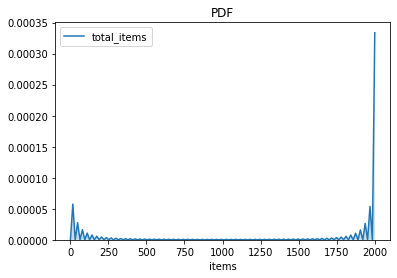

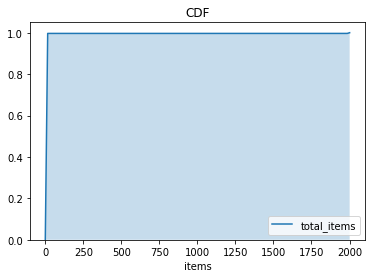

In [16]:
#univariate analysis of the total_items feature to check the distribution of the data points

x=data['total_items']

sns.kdeplot(x, shade=True)
plt.xlabel('items')
plt.title("PDF")
plt.show()

sns.kdeplot(x, shade=True, cumulative=True)
plt.xlabel('items')
plt.title('CDF')

plt.show()

#### This is slighty similar to the PDF/CDF we obtained for the 'order_amount' feature. We can that there is a sudden increase in the total_items.

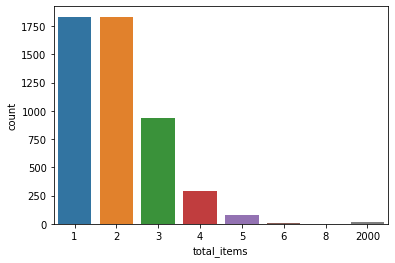

In [17]:
#using countplot to see how many items have been ordered frequently.

sns.countplot(x="total_items", data=data)
plt.show()

#### From the above plot we can see that most of the orders consists of 1 or 2 items and very few orders consists of 2000 items.

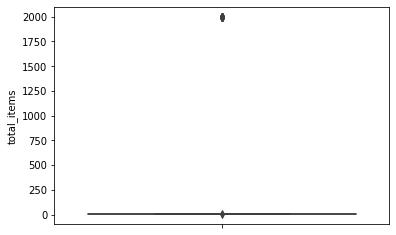

In [18]:
#using boxplot to check if there are any outliers

sns.boxplot(y="total_items", data =data)
plt.show()

#### From the plot we can infer that there are outlier points.

### Let us check the percentile values to get a better understanding of the data

In [19]:
#percentile values from 10 to 100

for i in range(10,110,10):
    per =data["total_items"].values
    print("{} percentile value is {}".format(i,np.percentile(per, i)))

10 percentile value is 1.0
20 percentile value is 1.0
30 percentile value is 1.0
40 percentile value is 2.0
50 percentile value is 2.0
60 percentile value is 2.0
70 percentile value is 2.0
80 percentile value is 3.0
90 percentile value is 3.0
100 percentile value is 2000.0


#### There is a high difference between 90th percentile and 100th percentile. So we will check the values in between them. 

In [20]:
#percentile values from 90 to 100

for i in range(90,101):
    per =data["total_items"].values
    print("{} percentile value is {}".format(i,np.percentile(per, i)))


90 percentile value is 3.0
91 percentile value is 3.0
92 percentile value is 3.0
93 percentile value is 4.0
94 percentile value is 4.0
95 percentile value is 4.0
96 percentile value is 4.0
97 percentile value is 4.0
98 percentile value is 5.0
99 percentile value is 5.0
100 percentile value is 2000.0


#### There is a huge difference between the 99th percentile and 100th percentile, so let us check the percentile values between 99th to 100th percentile. 

In [21]:
#percentile values from 99 to 100

for i in np.arange(99, 100.1, 0.1):
    per =data["total_items"].values
    print("{} percentile value is {}".format(np.round(i,2),np.percentile(per, i)))

99.0 percentile value is 5.0
99.1 percentile value is 5.0
99.2 percentile value is 5.0
99.3 percentile value is 5.0
99.4 percentile value is 5.0
99.5 percentile value is 6.0
99.6 percentile value is 6.0
99.7 percentile value is 2000.0
99.8 percentile value is 2000.0
99.9 percentile value is 2000.0
100.0 percentile value is 2000.0


####  There is high difference between 99.6th and 99.7th to 100th percetile values, hence we will take the values below 100th percetile value. 

### Analsing the features which have high order_amount and total_items.

In [22]:
high = data.sort_values("order_amount", ascending = False)
high.head(60)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


#### 1.We can see that all the orders which costed 704000 have been placed at the same time i.e 4:00 and same month i.e March. We can also see that there is more than one order which has been placed at the same time, date i.e on 2nd, 24th, 28th for the amount of 704000.

#### 2. Apart from that, orders with the amount 51450 consists of only 2 items and orders with the amount 25725 consists of only 1 item which is very unsual. 

#### 3. For all the orders with items = 2000 and order_amount = 704000 the payment_method is credit_card, it is highly unpractical to have a credit limit of 704000, which echos that they are outliers.
#### Till date 1,00,000 is the maximum credit limit for a credit card.
#### Reference: https://www.cardrates.com/advice/credit-card-credit-limits/ 

### Removing the outlier points 

In [23]:
data_filtered =data[(data.order_amount < 25725.0) & (data.total_items < 2000)]  

### Let us check the % of data remaining after removing the outliers

In [24]:
print("The percentage of data that is present after removing the outliers is", float(len(data_filtered))/len(data)*100)

The percentage of data that is present after removing the outliers is 98.74000000000001


#### This means that less than 2% of the data is lost after removing the outliers.

In [29]:
#understanding the filtered data

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4937 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        4937 non-null   int64 
 1   shop_id         4937 non-null   int64 
 2   user_id         4937 non-null   int64 
 3   order_amount    4937 non-null   int64 
 4   total_items     4937 non-null   int64 
 5   payment_method  4937 non-null   object
 6   created_at      4937 non-null   object
dtypes: int64(5), object(2)
memory usage: 308.6+ KB


In [30]:
data_filtered['order_amount'].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

In [31]:
import statistics
amount_list = data_filtered['order_amount']
amount =statistics.median(amount_list)
print(amount)

284


### What metric would you report for this dataset?
#### Instead of taking the Average value, it is better to the median value instead since it is less prone to outliers. 

### What is its value?
#### Here, the value of the median is 284.0 which is nothing but the 50th percentile. It can also be calculated by importing the statistics package.